<h1>2022.03.31. 강의 시간내 실습</h1>

<h3>1. 데이터 다운로드</h3>

In [315]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

<h3>2. DataFrame</h3>

In [316]:
diabetes = pd.read_csv("C:/ai_dataset/diabetes.csv")

In [317]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [318]:
diabetes.shape

(768, 9)

In [319]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [320]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<h3>3. EDA (상관관계 분석)</h3>

<h4>결측치 제거</h4>

In [321]:
diabetes.isna().sum()

## 결측치 없음

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

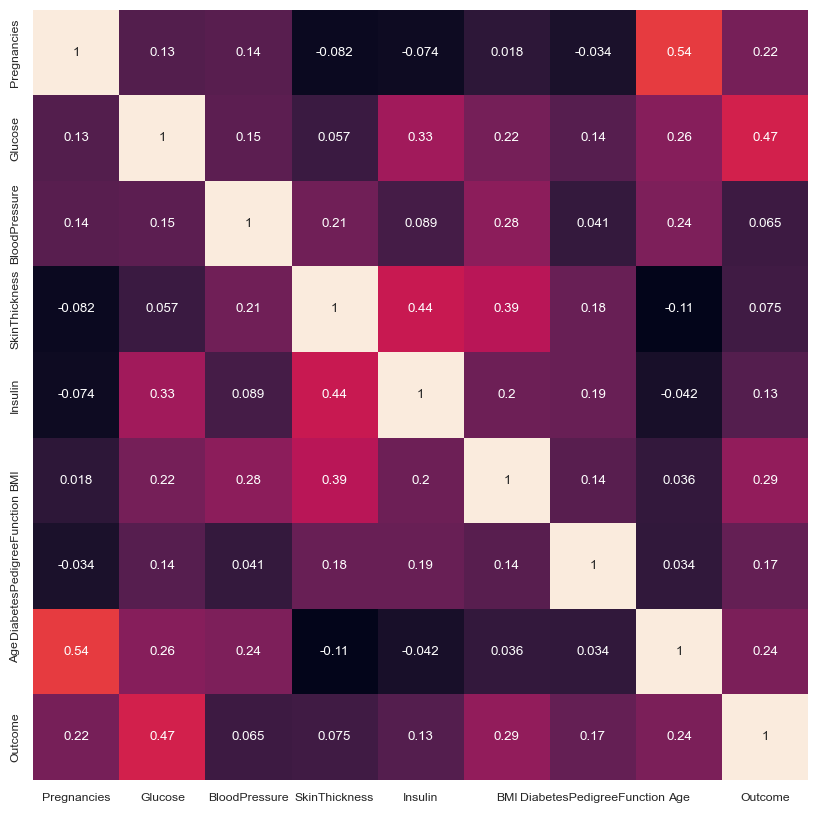

In [322]:
df_corr = diabetes.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

<h3>4. Train / Test 분류</h3>

In [323]:
from sklearn.model_selection import train_test_split

In [324]:
X = diabetes.drop('Outcome',axis=1)

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [325]:
y = diabetes['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

<h3>5. DT / RF / LR / SVM 으로 분류</h3>

In [327]:
from sklearn.metrics import mean_squared_error

In [328]:
from sklearn.metrics import confusion_matrix

<h3>DT</h3>

In [329]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

1.0


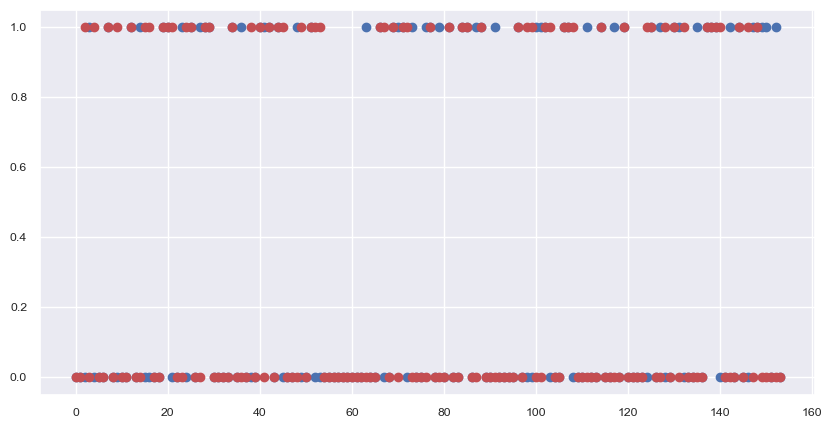

In [330]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_dt, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [331]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5640760748177662


<h3>RF</h3>

In [332]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

1.0


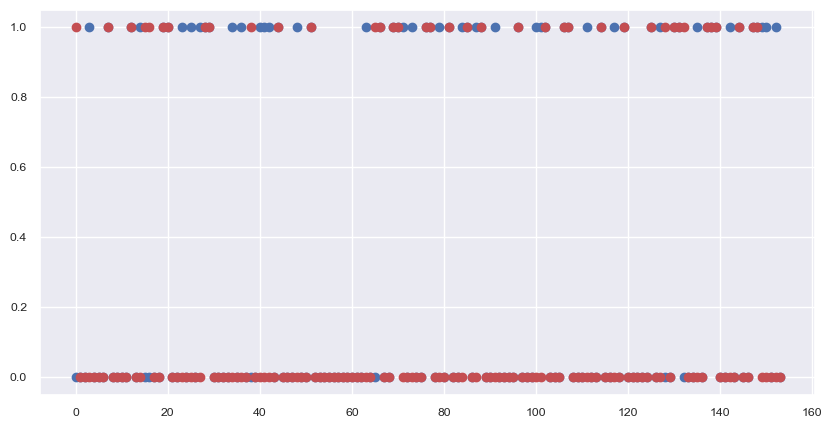

In [333]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_rf, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [334]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.4767312946227962


<h3>LR</h3>

In [335]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=12)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.7719869706840391


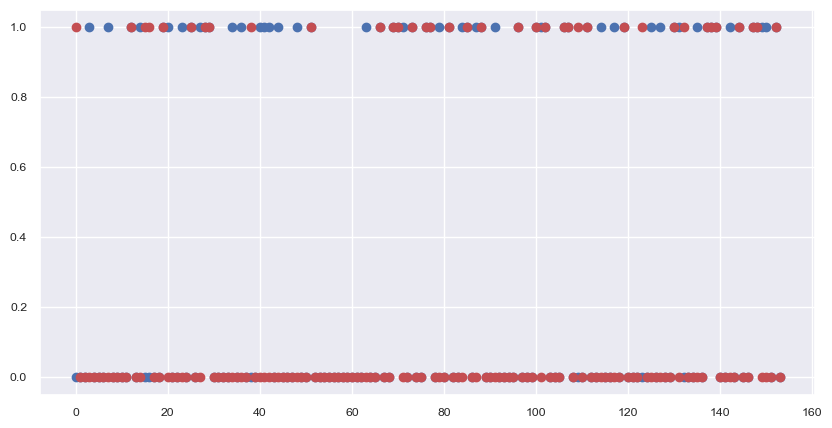

In [336]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_lr, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()

In [337]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.48349377841522817


<h3>SVM</h3>

In [338]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.7736156351791531


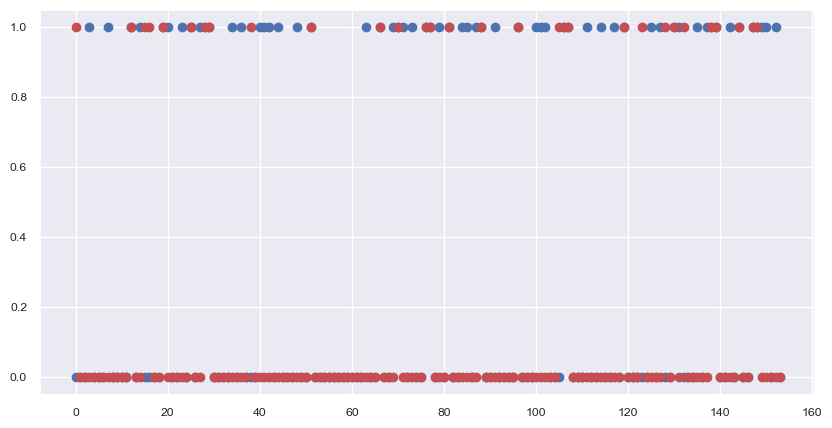

In [339]:
indices = np.arange(len(X_test))

plt.figure(figsize=(10,5))
plt.scatter(indices, y_test, label='y_test')
plt.scatter(indices, pred_svm, c='r', label='y_pred')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show() 

In [340]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 0.5405624776173353


<h3>6. outcome 제거</h3>

In [341]:
diabetes.drop(columns=['Outcome'], inplace=True)

In [342]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


<h3>7. 회귀문제</h3>

In [343]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [344]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [345]:
print("회귀계수(기울기):", np.round(lr.coef_, 1)) 
print("상수항(절편):", np.round(lr.intercept_, 1))

회귀계수(기울기): [ 0.   0.  -0.   0.  -0.   0.   0.1  0. ]
상수항(절편): -0.8


In [346]:
linear_y_preds = lr.predict(X_test)
print(X_train.shape, X_test.shape)

(614, 8) (154, 8)


In [347]:
mse = mean_squared_error(y_test, linear_y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, linear_y_preds):.3f}')

MSE : 0.170, RMSE: 0.412
Variance score : 0.281


In [348]:
print("절편 값:", lr.intercept_)

print("회귀계수:", np.round(lr.coef_,1))

절편 값: -0.8395154508023903
회귀계수: [ 0.   0.  -0.   0.  -0.   0.   0.1  0. ]


<h3>8. BMI로부터 glucos 예측(DT, RF, LR, SVM)</h3>

In [349]:
diabetes.drop(columns=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], inplace=True)

In [350]:
diabetes.head()

,Glucose,BMI
0,148,33.6
1,85,26.6
2,183,23.3
3,89,28.1
4,137,43.1


In [351]:
X = diabetes['BMI'].values.reshape(-1, 1)

In [352]:
y = diabetes['Glucose'].values.reshape(-1, 1)

In [353]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

<h3>DT</h3>

In [354]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=10)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print(clf_dt.score(X_train, y_train))

0.38599348534201955


In [355]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 49.12533665328617


<h3>RF</h3>

In [356]:
from sklearn.tree import DecisionTreeClassifier

rf_clf = DecisionTreeClassifier(random_state=10)
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)

print(rf_clf.score(X_train, y_train))

0.38599348534201955


In [357]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 49.12533665328617


<h3>LR</h3>

In [358]:
from sklearn.tree import DecisionTreeClassifier

clf_lr = DecisionTreeClassifier(random_state=10)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print(clf_lr.score(X_train, y_train))

0.38599348534201955


In [359]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 49.12533665328617


<h3>SVM</h3>

In [360]:
from sklearn.tree import DecisionTreeClassifier

clf_svm = DecisionTreeClassifier(random_state=10)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(clf_svm.score(X_train, y_train))

0.38599348534201955


In [361]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 49.12533665328617
